In [60]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Contouring Segmentation for images of different color ranges (Background Subtraction)
##### Contouring works when there is a strong difference of intensity (black or white in gray map) around the border of the image. The bird's wings are dark with low intensity of color [0, 0, 0] but the sky and clouds have high intensity with color channels closer to 255. 

In [75]:
image = cv2.imread("flying_birds.jpg")

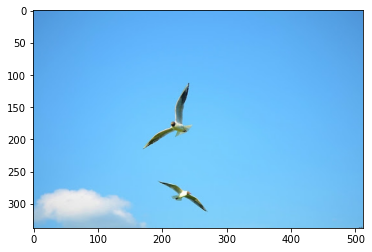

In [76]:
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

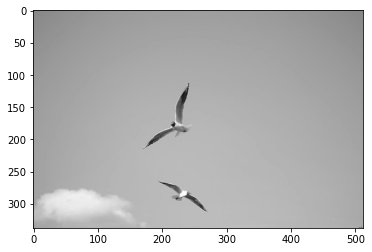

In [77]:
gray_image = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap = "gray")

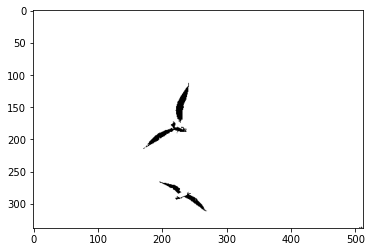

In [79]:
ret, thresh = cv2.threshold(gray_image,130,255,0)
plt.imshow(thresh, cmap = "gray")
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

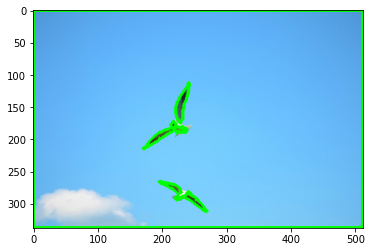

In [83]:
image_copy_2 = np.copy(image_copy)
contour_image = cv2.drawContours(image_copy_2, contours, -1, (0,255,0), 3)
plt.imshow(contour_image)

### KMeans Segmentation on different Images

##### Segmentation through kmeans works when there is a color difference between parts of an image. The Kmeans serves to cluster the image colors and give it a label where the center of each cluster becomes the new color in the segmented image. In the image below, the kmeans clusters the parts of a rhino and grass into 3 colors. 

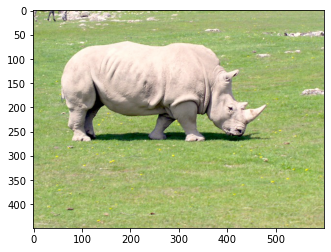

In [230]:
new_image = cv2.imread("rhino.jpg")
new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
plt.imshow(new_image)

In [231]:
image_vec = np.float32(new_image.reshape((-1, 3)))
K_amount = 3

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center= cv2.kmeans(image_vec, K_amount,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)



In [232]:
center = np.uint8(center)
segmented_color_for_each_pixel = center[label.squeeze()]
segmented_image = segmented_color_for_each_pixel.reshape(new_image.shape)


In [233]:
print(np.unique(label))
print(center)

[0 1 2]
[[237 220 206]
 [162 180 112]
 [ 67  72  57]]


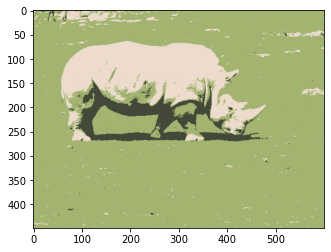

In [234]:
plt.imshow(segmented_image)

[ 57  67  72 112 162 180 206 220 237]


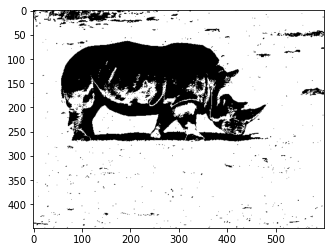

In [235]:
print(np.unique(segmented_image)) #3 different RGB colors
labels_reshaped = label.reshape((new_image.shape[0], new_image.shape[1]))
plt.imshow(labels_reshaped == 1, cmap = "gray")

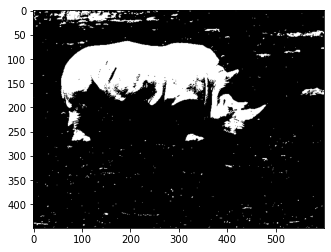

In [236]:
plt.imshow(labels_reshaped == 0, cmap = "gray")

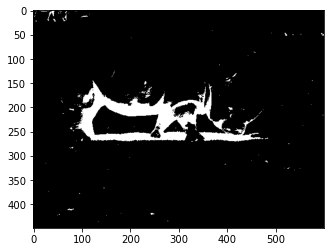

In [238]:
plt.imshow(labels_reshaped == 2, cmap = "gray")